# Sectors Review

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from sklearn import covariance

from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

In [2]:
data = pd.read_csv('../../data/sp500_Company_Overview.csv', index_col=0)
data.head()

,AssetType,Name,Description,CIK,Exchange,Currency,Country,Sector,Industry,Address,...,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding,DividendDate,ExDividendDate
Symbol,,,,,,,,,,,,,,,,,,,,,
MMM,Common Stock,3M Company,The 3M Company is an American multinational co...,66740.0,NYSE,USD,USA,LIFE SCIENCES,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,"3M CENTER, BLDG. 220-13E-26A, ST PAUL, MN, US",...,1.879,-9.08,1.001,105.52,68.63,101.50,98.13,5.533610e+08,2024-06-12,2024-05-23
AOS,Common Stock,Smith AO Corporation,A. O. Smith Corporation is an American manufac...,91142.0,NYSE,USD,USA,MANUFACTURING,HOUSEHOLD APPLIANCES,"11270 WEST PARK PLACE, MILWAUKEE, WI, US",...,3.248,15.19,1.141,92.44,63.34,83.92,81.37,1.207840e+08,2024-08-15,2024-07-31
ABT,Common Stock,Abbott Laboratories,Abbott Laboratories is an American multination...,1800.0,NYSE,USD,USA,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,"100 ABBOTT PARK ROAD, ABBOTT PARK, IL, US",...,4.928,18.75,0.718,120.40,88.33,103.84,106.60,1.739630e+09,2024-08-15,2024-07-15
ABBV,Common Stock,AbbVie Inc,AbbVie is an American publicly traded biopharm...,1551152.0,NYSE,USD,USA,LIFE SCIENCES,PHARMACEUTICAL PREPARATIONS,"1 NORTH WAUKEGAN ROAD, NORTH CHICAGO, IL, US",...,6.15,19.45,0.623,179.55,132.11,166.45,162.53,1.765870e+09,2024-08-15,2024-07-15
ACN,Common Stock,Accenture plc,Accenture plc is an Irish-domiciled multinatio...,1467373.0,NYSE,USD,USA,TRADE & SERVICES,"SERVICES-BUSINESS SERVICES, NEC","1 GRAND CANAL SQUARE, GRAND CANAL HARBOUR, DUB...",...,3.041,18.21,1.227,384.33,277.47,301.44,329.36,6.263840e+08,2024-08-15,2024-07-11


In [3]:
data.drop(['AssetType',
           'CIK',
           'Exchange',
           'Description',
           'Currency',
           'Country',
           'Address',
           'DividendPerShare',
           'FiscalYearEnd',
           'LatestQuarter',
           'DividendDate',
           'ExDividendDate',
          ], inplace=True, axis=1)

In [4]:
data.replace('None', np.nan, inplace=True)

In [5]:
data['MarketCapitalization'] = data['MarketCapitalization'].astype(float)
data['Beta'] = data['Beta'].astype(float)
data['PEGRatio'] = data['PEGRatio'].astype(float)
data['PERatio'] = data['PERatio'].astype(float)
data['BookValue'] = data['BookValue'].astype(float)
data['DividendYield'] = data['DividendYield'].astype(float)
data['EPS'] = data['EPS'].astype(float)
data['RevenuePerShareTTM'] = data['RevenuePerShareTTM'].astype(float)
data['ProfitMargin'] = data['ProfitMargin'].astype(float)
data['OperatingMarginTTM'] = data['OperatingMarginTTM'].astype(float)
data['ReturnOnAssetsTTM'] = data['ReturnOnAssetsTTM'].astype(float)
data['EBITDA'] = data['EBITDA'].astype(float)
data['RevenueTTM'] = data['RevenueTTM'].astype(float)
data['GrossProfitTTM'] = data['GrossProfitTTM'].astype(float)
data['DilutedEPSTTM'] = data['DilutedEPSTTM'].astype(float)
data['QuarterlyEarningsGrowthYOY'] = data['QuarterlyEarningsGrowthYOY'].astype(float)
data['QuarterlyRevenueGrowthYOY'] = data['QuarterlyRevenueGrowthYOY'].astype(float)
data['52WeekHigh'] = data['52WeekHigh'].astype(float)
data['52WeekLow'] = data['52WeekLow'].astype(float)

In [6]:
data['Sector'].unique()

array(['LIFE SCIENCES', 'MANUFACTURING', 'TRADE & SERVICES', 'TECHNOLOGY',
       'ENERGY & TRANSPORTATION', 'FINANCE', 'REAL ESTATE & CONSTRUCTION'],
      dtype=object)

In [7]:
data.groupby(['Sector']).count()['Name'].to_frame().sort_values('Name', ascending=False)

,Name
Sector,
MANUFACTURING,96
LIFE SCIENCES,80
ENERGY & TRANSPORTATION,76
TRADE & SERVICES,75
TECHNOLOGY,69
FINANCE,65
REAL ESTATE & CONSTRUCTION,42


In [8]:
multps = {
    'capital'  : ['MarketCapitalization', 'EBITDA', 'BookValue', 'RevenueTTM', 'GrossProfitTTM', ],
    'ratio'    : ['PERatio', 'PEGRatio',],
    'dividend' : ['DividendPerShare', 'DividendYield', 'EPS', 'RevenuePerShareTTM', 'DilutedEPSTTM',],
    'margin'   : ['ProfitMargin', 'OperatingMarginTTM',],
    'returns'  : ['ReturnOnAssetsTTM', 'ReturnOnEquityTTM', 'QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY'],
}

## LIFE SCIENCES

In [9]:
lf = data[data['Sector']=='LIFE SCIENCES'].copy()
lf.drop('Sector', axis=1, inplace=True)

In [10]:
lf.head()

,Name,Industry,MarketCapitalization,EBITDA,PERatio,PEGRatio,BookValue,DividendYield,EPS,RevenuePerShareTTM,...,PriceToSalesRatioTTM,PriceToBookRatio,EVToRevenue,EVToEBITDA,Beta,52WeekHigh,52WeekLow,50DayMovingAverage,200DayMovingAverage,SharesOutstanding
Symbol,,,,,,,,,,,,,,,,,,,,,
MMM,3M Company,SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,5.808631e+10,8.146000e+09,NaN,1.905,8.790,0.0267,-12.73,58.89,...,1.546,10.51,1.879,-9.08,1.001,105.52,68.63,101.50,98.13,5.533610e+08
ABT,Abbott Laboratories,PHARMACEUTICAL PREPARATIONS,1.804344e+11,1.048500e+10,32.72,5.990,22.310,0.0212,3.17,23.41,...,4.72,4.904,4.928,18.75,0.718,120.40,88.33,103.84,106.60,1.739630e+09
ABBV,AbbVie Inc,PHARMACEUTICAL PREPARATIONS,3.065727e+11,2.611600e+10,51.52,0.449,4.535,0.0357,3.37,30.77,...,5.29,27.74,6.15,19.45,0.623,179.55,132.11,166.45,162.53,1.765870e+09
A,Agilent Technologies Inc,INSTRUMENTS FOR MEAS & TESTING OF ELECTRICITY ...,3.892675e+10,1.612000e+09,31.62,2.701,21.310,0.0071,4.22,22.53,...,6.12,6.66,6.24,24.88,1.049,155.06,96.30,136.10,133.04,2.917610e+08
APD,Air Products and Chemicals Inc,INDUSTRIAL INORGANIC CHEMICALS,5.525416e+10,4.115100e+09,22.45,1.372,67.080,0.0269,11.07,54.64,...,4.143,3.461,4.989,13.79,0.822,299.60,209.25,263.88,257.75,2.223060e+08


In [11]:
cat = pd.DataFrame(index=lf.index)

### MarketCapitalization, EBITDA and BookValue

In [12]:
marketcap_top10 = lf[['Name']+multps['capital']].sort_values('MarketCapitalization', ascending=False).head(10)
ebitda_top10 = lf[['Name']+multps['capital']].sort_values('EBITDA', ascending=False).head(10)
bookval_top10 = lf[['Name']+multps['capital']].sort_values('BookValue', ascending=False).head(10)

marketcap_bt10 = lf[['Name']+multps['capital']].sort_values('MarketCapitalization').head(10)
ebitda_bt10 = lf[['Name']+multps['capital']].sort_values('EBITDA').head(10)
bookval_bt10 = lf[['Name']+multps['capital']].sort_values('BookValue').head(10)

In [13]:
m_top = set(marketcap_top10.index.to_list())
e_top = set(ebitda_top10.index.to_list())
b_top = set(bookval_top10.index.to_list())

m_bt = set(marketcap_bt10.index.to_list())
e_bt = set(ebitda_bt10.index.to_list())
b_bt = set(bookval_bt10.index.to_list())

print('TOP-10:')
print(f'MarketCapitalization intersection EBITDA: {m_top.intersection(e_top)}')
print(f'MarketCapitalization intersection BookValue: {m_top.intersection(b_top)}')
print(f'BookValue intersection EBITDA: {b_top.intersection(e_top)}')
print(f'MarketCap, BookValue, EBITDA intersection: {set.intersection(m_top, e_top, b_top)}')

print('\n\nBOTTOM-10:')
print(f'MarketCapitalization intersection EBITDA: {m_bt.intersection(e_bt)}')
print(f'MarketCapitalization intersection BookValue: {m_bt.intersection(b_bt)}')
print(f'BookValue intersection EBITDA: {b_bt.intersection(e_bt)}')
print(f'MarketCap, BookValue, EBITDA intersection: {set.intersection(m_bt, e_bt, b_bt)}')

TOP-10:
MarketCapitalization intersection EBITDA: {'JNJ', 'LLY', 'MRK', 'ABBV', 'LIN', 'AMGN', 'PG'}
MarketCapitalization intersection BookValue: {'TMO', 'LIN'}
BookValue intersection EBITDA: {'LIN'}
MarketCap, BookValue, EBITDA intersection: {'LIN'}


BOTTOM-10:
MarketCapitalization intersection EBITDA: {'CTLT', 'BIO', 'ALB', 'TECH', 'TFX', 'FMC'}
MarketCapitalization intersection BookValue: set()
BookValue intersection EBITDA: set()
MarketCap, BookValue, EBITDA intersection: set()


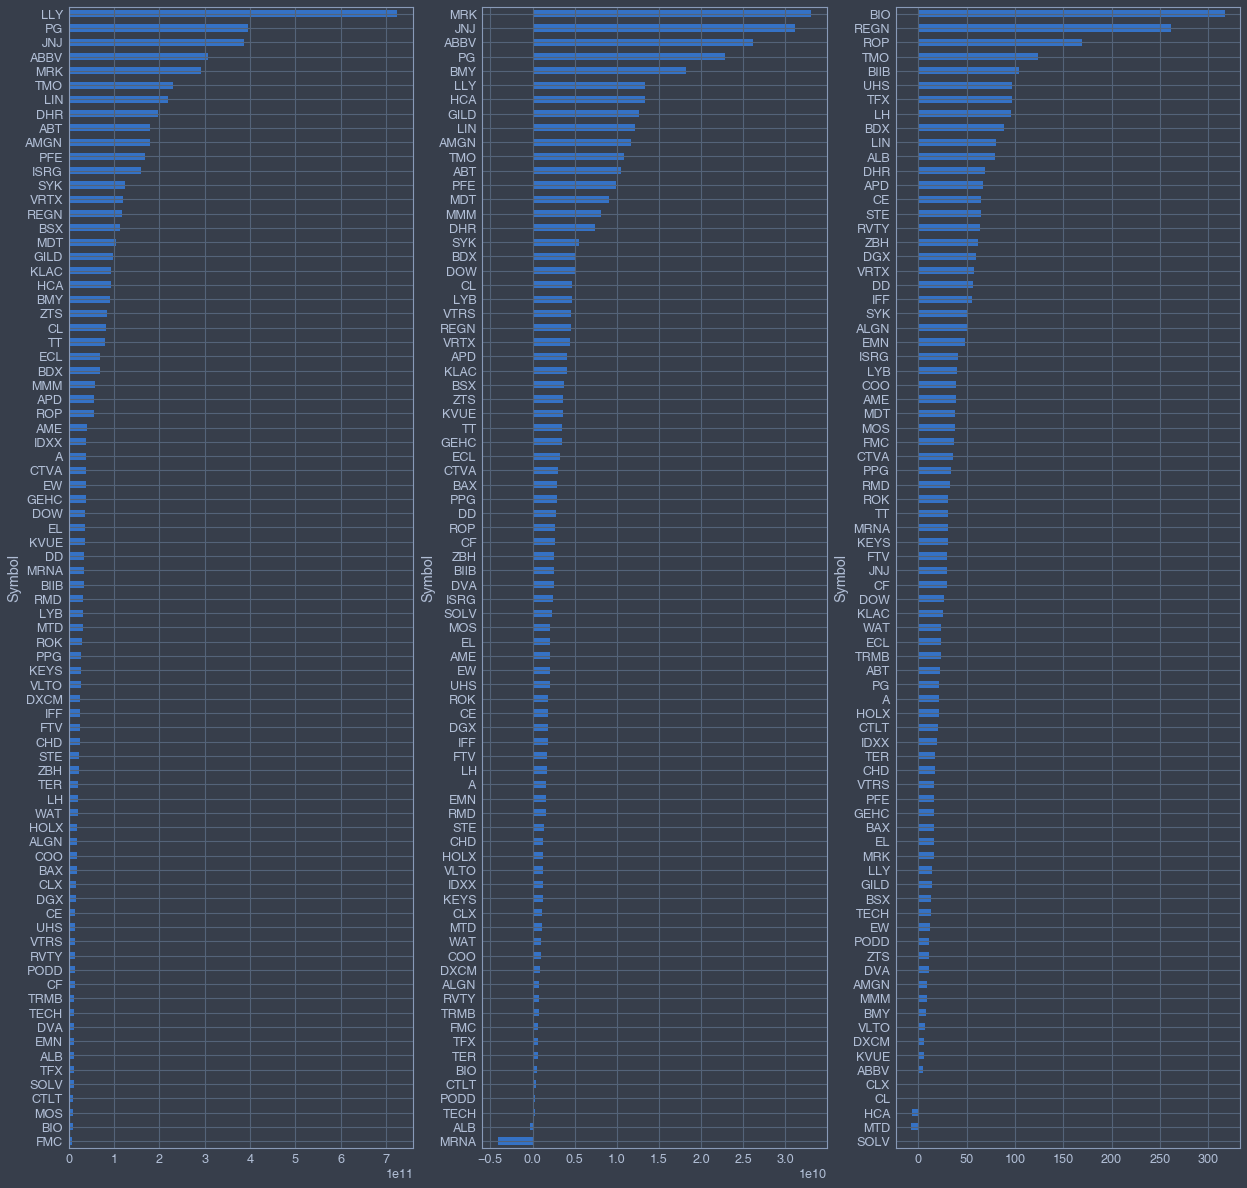

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(21, 21))

lf.sort_values('MarketCapitalization', ascending=False)['MarketCapitalization'].plot(kind='barh', ax=axs[0]).invert_yaxis()
lf.sort_values('EBITDA', ascending=False)['EBITDA'].plot(kind='barh', ax=axs[1]).invert_yaxis()
lf.sort_values('BookValue', ascending=False)['BookValue'].plot(kind='barh', ax=axs[2]).invert_yaxis()

In [14]:
data = lf['MarketCapitalization']
bins = pd.cut(data, 4)
results = (pd.Series(data).groupby(bins).agg(['count', 'min', 'idxmin', 'max', 'idxmax']).reset_index())
results

,MarketCapitalization,count,min,idxmin,max,idxmax
0,"(7411078440.0, 187180431000.0]",72,8.127291e+09,FMC,1.804344e+11,ABT
1,"(187180431000.0, 366233571000.0]",5,1.978214e+11,DHR,3.065727e+11,ABBV
2,"(366233571000.0, 545286711000.0]",2,3.869879e+11,JNJ,3.962049e+11,PG
3,"(545286711000.0, 724339851000.0]",1,7.243399e+11,LLY,7.243399e+11,LLY


In [15]:
data = lf['EBITDA']
bins = pd.cut(data, 4)
results = (pd.Series(data).groupby(bins).agg(['count', 'min', 'idxmin', 'max', 'idxmax']).reset_index())
results

,EBITDA,count,min,idxmin,max,idxmax
0,"(-4144162065.064, 5183500202.0]",63,-4.107000e+09,MRNA,5.070000e+09,BDX
1,"(5183500202.0, 14474000468.0]",12,5.546000e+09,SYK,1.337370e+10,LLY
2,"(14474000468.0, 23764500734.0]",2,1.817200e+10,BMY,2.288500e+10,PG
3,"(23764500734.0, 33055001000.0]",3,2.611600e+10,ABBV,3.305500e+10,MRK


In [16]:
data = lf['BookValue']
bins = pd.cut(data, 4)
results = (pd.Series(data).groupby(bins).agg(['count', 'min', 'idxmin', 'max', 'idxmax']).reset_index())
results

,BookValue,count,min,idxmin,max,idxmax
0,"(-7.504, 73.945]",68,-7.18,MTD,68.92,DHR
1,"(73.945, 155.07]",8,79.11,ALB,124.17,TMO
2,"(155.07, 236.195]",1,169.21,ROP,169.21,ROP
3,"(236.195, 317.32]",2,261.41,REGN,317.32,BIO


In [17]:
ind_cap = lf.groupby('Industry').agg({'Name': 'count',
                                      'MarketCapitalization': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                      'EBITDA': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                      'BookValue': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                                     })


In [55]:
mc_norm = preprocessing.normalize(ind_cap['MarketCapitalization']['sum'].to_numpy().reshape(1, -1))
eb_norm = preprocessing.normalize(ind_cap['EBITDA']['sum'].to_numpy().reshape(1, -1))
bv_norm = preprocessing.normalize(ind_cap['BookValue']['sum'].to_numpy().reshape(1, -1))

df_norm = pd.DataFrame(index=ind_cap.index, data={'MarketCapitalization': mc_norm.flatten(),
                                            'EBITDA': eb_norm.flatten(),
                                            'BookValue': bv_norm.flatten(),
                                           })

,MarketCapitalization,EBITDA,BookValue
Industry,,,
AGRICULTURAL CHEMICALS,0.008253,0.027746,0.072485
AGRICULTURAL PRODUCTION-CROPS,0.014329,0.017588,0.038447
AUTO CONTROLS FOR REGULATING RESIDENTIAL & COMML ENVIRONMENTS,0.029510,0.020629,0.033312
"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",0.131548,0.134892,0.185475
CHEMICALS & ALLIED PRODUCTS,0.003017,0.003957,0.039574
ELECTROMEDICAL & ELECTROTHERAPEUTIC APPARATUS,0.038793,0.052969,0.041480
IN VITRO & IN VIVO DIAGNOSTIC SUBSTANCES,0.014595,0.007207,0.020507
INDUSTRIAL INORGANIC CHEMICALS,0.101513,0.095440,0.160179
"INDUSTRIAL INSTRUMENTS FOR MEASUREMENT, DISPLAY, AND CONTROL",0.127772,0.088119,0.365056


<AxesSubplot:ylabel='Industry'>

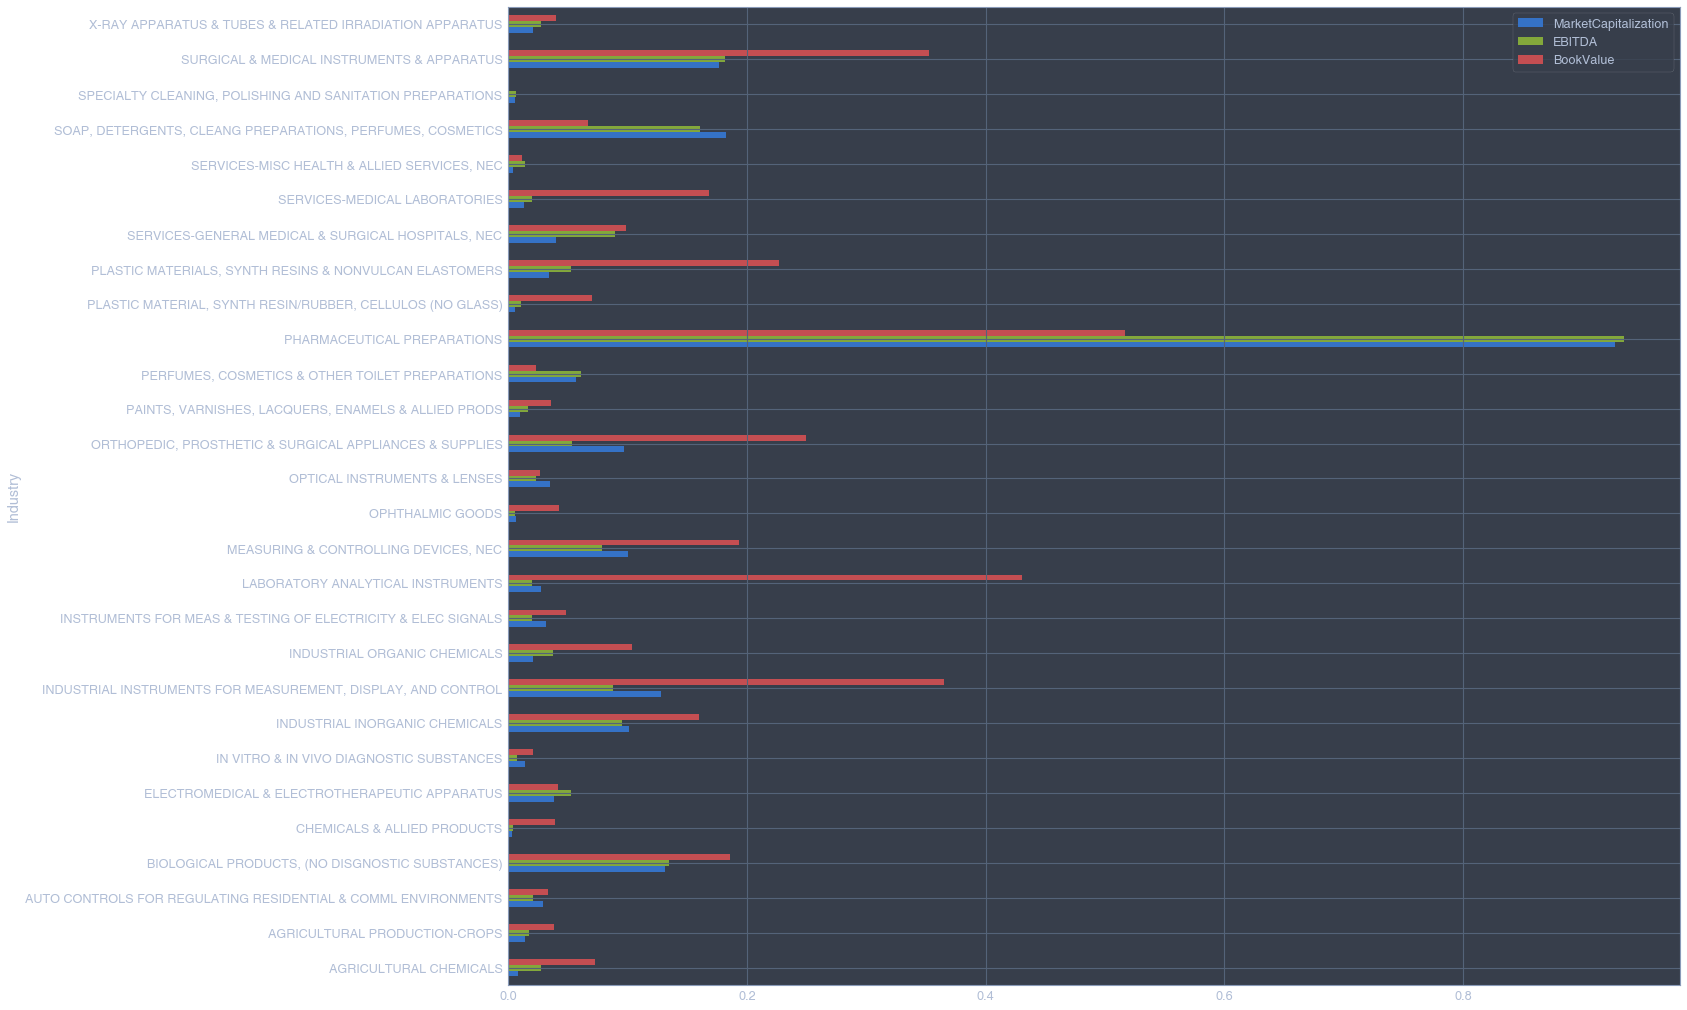

In [60]:
fig, ax = plt.subplots(figsize=(21, 18))
df_norm.plot(kind='barh', ax=ax)

### 52WeekLow / 52WeekHigh

<AxesSubplot:xlabel='Symbol'>

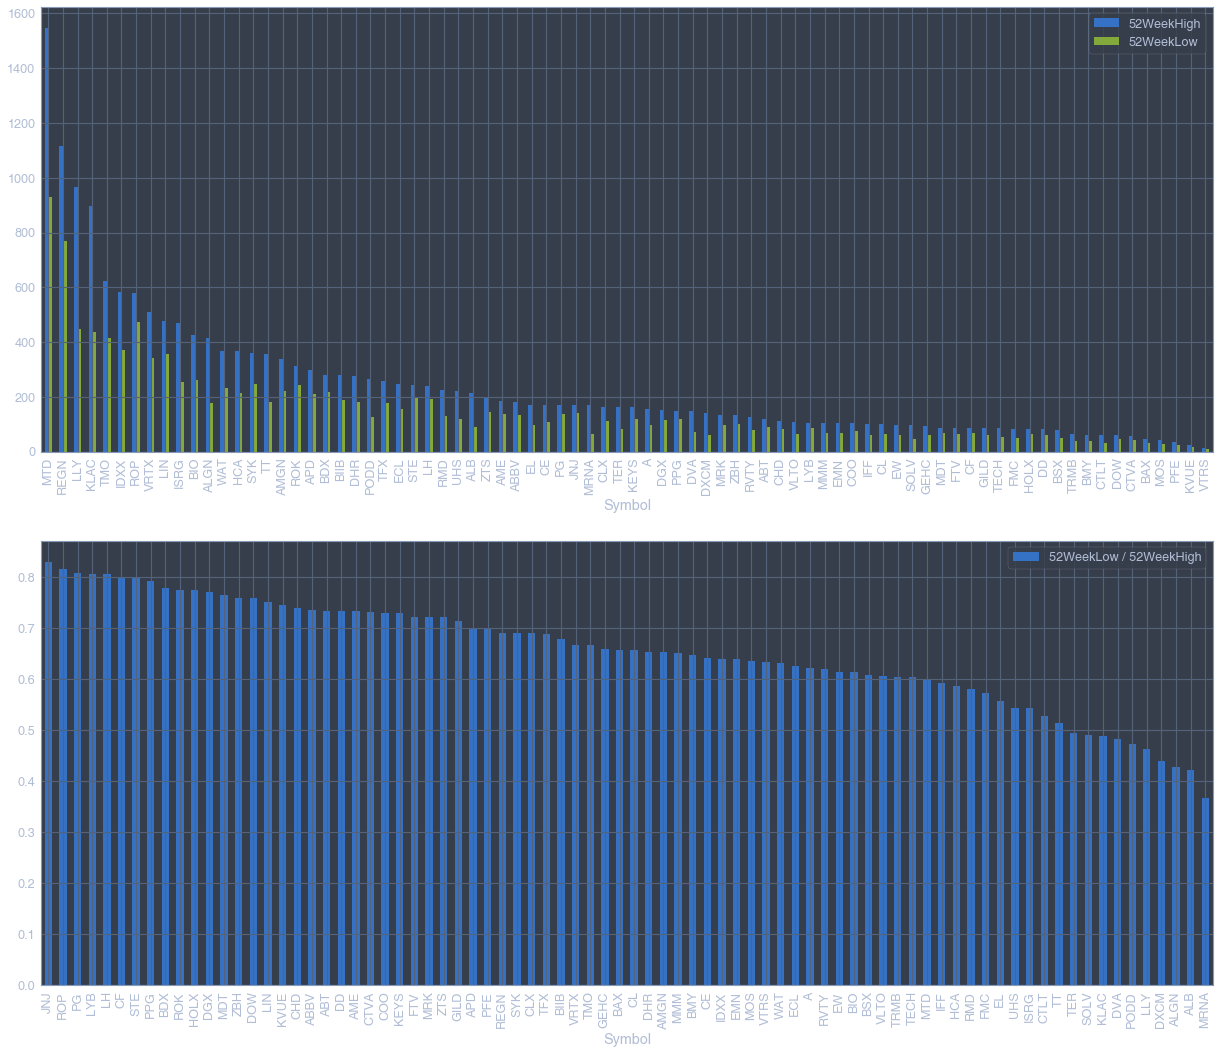

In [23]:
low_high = (lf['52WeekLow'] / lf['52WeekHigh']).to_frame().sort_values(0, ascending=False)
low_high.rename(columns={0: '52WeekLow / 52WeekHigh'}, inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(21, 18))
lf[['52WeekHigh', '52WeekLow']].sort_values('52WeekHigh', ascending=False).plot(kind='bar', ax=ax[0])
low_high.plot(kind='bar', ax=ax[1])

In [23]:
summ = lf.groupby('Industry').agg({'Name': 'count',
                            'MarketCapitalization': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'EBITDA': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'BookValue': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'DividendYield': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'EPS': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'RevenuePerShareTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'ProfitMargin': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'OperatingMarginTTM': ['min', 'idxmin', 'max', 'idxmax'],
                            'ReturnOnAssetsTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'ReturnOnEquityTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'RevenueTTM': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'QuarterlyEarningsGrowthYOY': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                            'QuarterlyRevenueGrowthYOY': ['sum', 'min', 'idxmin', 'max', 'idxmax'],
                           })
summ_pv = pd.DataFrame(columns=summ.index, index=summ.columns, data=summ.to_numpy().transpose())
summ_pv

Industry                         AGRICULTURAL CHEMICALS  \
Name                      count                       2   
MarketCapitalization      sum             22236045000.0   
                          min              8799740000.0   
                          idxmin                    MOS   
                          max             13436305000.0   
...                                                 ...   
QuarterlyRevenueGrowthYOY sum                    -0.526   
                          min                    -0.269   
                          idxmin                     CF   
                          max                    -0.257   
                          idxmax                    MOS   

Industry                         AGRICULTURAL PRODUCTION-CROPS  \
Name                      count                              1   
MarketCapitalization      sum                    38605500000.0   
                          min                    38605500000.0   
                          idxmin                          CTVA   
                          max                    38605500000.0   
...                                                        ...   
QuarterlyRevenueGrowthYOY sum                            -0.08   
                          min                            -0.08   
                          idxmin                          CTVA   
                          max                            -0.08   
                          idxmax                          CTVA   

Industry                         AUTO CONTROLS FOR REGULATING RESIDENTIAL & COMML ENVIRONMENTS  \
Name                      count                                                   1              
MarketCapitalization      sum                                         79508054000.0              
                          min                                         79508054000.0              
                          idxmin                                                 TT              
                          max                                         79508054000.0              
...                                                                             ...              
QuarterlyRevenueGrowthYOY sum                                                 0.128              
                          min                                                 0.128              
                          idxmin                                                 TT              
                          max                                                 0.128              
                          idxmax                                                 TT              

Industry                         BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)  \
Name                      count                                                5   
MarketCapitalization      sum                                     354420660000.0   
                          min                                      12230172000.0   
                          idxmin                                            TECH   
                          max                                     178761597000.0   
...                                                                          ...   
QuarterlyRevenueGrowthYOY sum                                             -0.064   
                          min                                             -0.299   
                          idxmin                                            MRNA   
                          max                                               0.22   
                          idxmax                                            AMGN   

Industry                         CHEMICALS & ALLIED PRODUCTS  \
Name                      count                            1   
MarketCapitalization      sum                   8127291000.0   
                          min                   8127291000.0   
                          idxmin                        

In [27]:
summ_pv.loc['MarketCapitalization']

Industry,AGRICULTURAL CHEMICALS,AGRICULTURAL PRODUCTION-CROPS,AUTO CONTROLS FOR REGULATING RESIDENTIAL & COMML ENVIRONMENTS,"BIOLOGICAL PRODUCTS, (NO DISGNOSTIC SUBSTANCES)",CHEMICALS & ALLIED PRODUCTS,ELECTROMEDICAL & ELECTROTHERAPEUTIC APPARATUS,IN VITRO & IN VIVO DIAGNOSTIC SUBSTANCES,INDUSTRIAL INORGANIC CHEMICALS,"INDUSTRIAL INSTRUMENTS FOR MEASUREMENT, DISPLAY, AND CONTROL",INDUSTRIAL ORGANIC CHEMICALS,...,PHARMACEUTICAL PREPARATIONS,"PLASTIC MATERIAL, SYNTH RESIN/RUBBER, CELLULOS (NO GLASS)","PLASTIC MATERIALS, SYNTH RESINS & NONVULCAN ELASTOMERS","SERVICES-GENERAL MEDICAL & SURGICAL HOSPITALS, NEC",SERVICES-MEDICAL LABORATORIES,"SERVICES-MISC HEALTH & ALLIED SERVICES, NEC","SOAP, DETERGENTS, CLEANG PREPARATIONS, PERFUMES, COSMETICS","SPECIALTY CLEANING, POLISHING AND SANITATION PREPARATIONS",SURGICAL & MEDICAL INSTRUMENTS & APPARATUS,X-RAY APPARATUS & TUBES & RELATED IRRADIATION APPARATUS
sum,22236045000.0,38605500000.0,79508054000.0,354420660000.0,8127291000.0,104517829000.0,39321465000.0,273499226000.0,344247650000.0,55974355000.0,...,2497097840000.0,14952218000.0,93417015000.0,108263920000.0,36044243000.0,12051214000.0,491027862000.0,16716946000.0,475383245000.0,56121099000.0
min,8799740000.0,38605500000.0,79508054000.0,12230172000.0,8127291000.0,104517829000.0,39321465000.0,55254155000.0,24947855000.0,25238893000.0,...,10555658000.0,14952218000.0,10997001000.0,14570156000.0,16228905000.0,12051214000.0,24789742000.0,16716946000.0,10784012000.0,18955719000.0
idxmin,MOS,CTVA,TT,TECH,FMC,MDT,IDXX,APD,FTV,IFF,...,CTLT,CE,ALB,UHS,DGX,DVA,CHD,CLX,SOLV,HOLX
max,13436305000.0,38605500000.0,79508054000.0,178761597000.0,8127291000.0,104517829000.0,39321465000.0,218245071000.0,197821366000.0,30735462000.0,...,724339851000.0,14952218000.0,37050687000.0,93693764000.0,19815338000.0,12051214000.0,396204933000.0,16716946000.0,124226642000.0,37165380000.0
idxmax,CF,CTVA,TT,AMGN,FMC,MDT,IDXX,LIN,DHR,LYB,...,LLY,CE,DOW,HCA,LH,DVA,PG,CLX,SYK,GEHC
